In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
df = pd.read_csv('seeds.csv')

In [3]:
print(df.head())

    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1  


In [4]:
df.columns = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'target']

In [5]:
print(df.head())

    area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry_coefficient  length_of_kernel_groove  target  
0                  2.221                    5.220       1  
1                  1.018                    4.956       1  
2                  2.699                    4.825       1  
3                  2.259                    4.805       1  
4                  1.355                    5.175       1  


In [6]:
print(df.target.shape)

(199,)


In [7]:
# Compter le nombre de valeurs manquantes dans chaque colonne
print(df.isnull().sum())

area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
target                     0
dtype: int64


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Arbre de decision C4.5

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Entraîner le modèle C4.5
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = clf.predict(X_test)

# Évaluer les performances du modèle
accuracy_c45 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_c45)

# Calcul du F1-score
f1_c45 = f1_score(y_test, y_pred, average='weighted')
print('F1-score: {:.2f}'.format(f1_c45))

Accuracy: 0.85
F1-score: 0.86


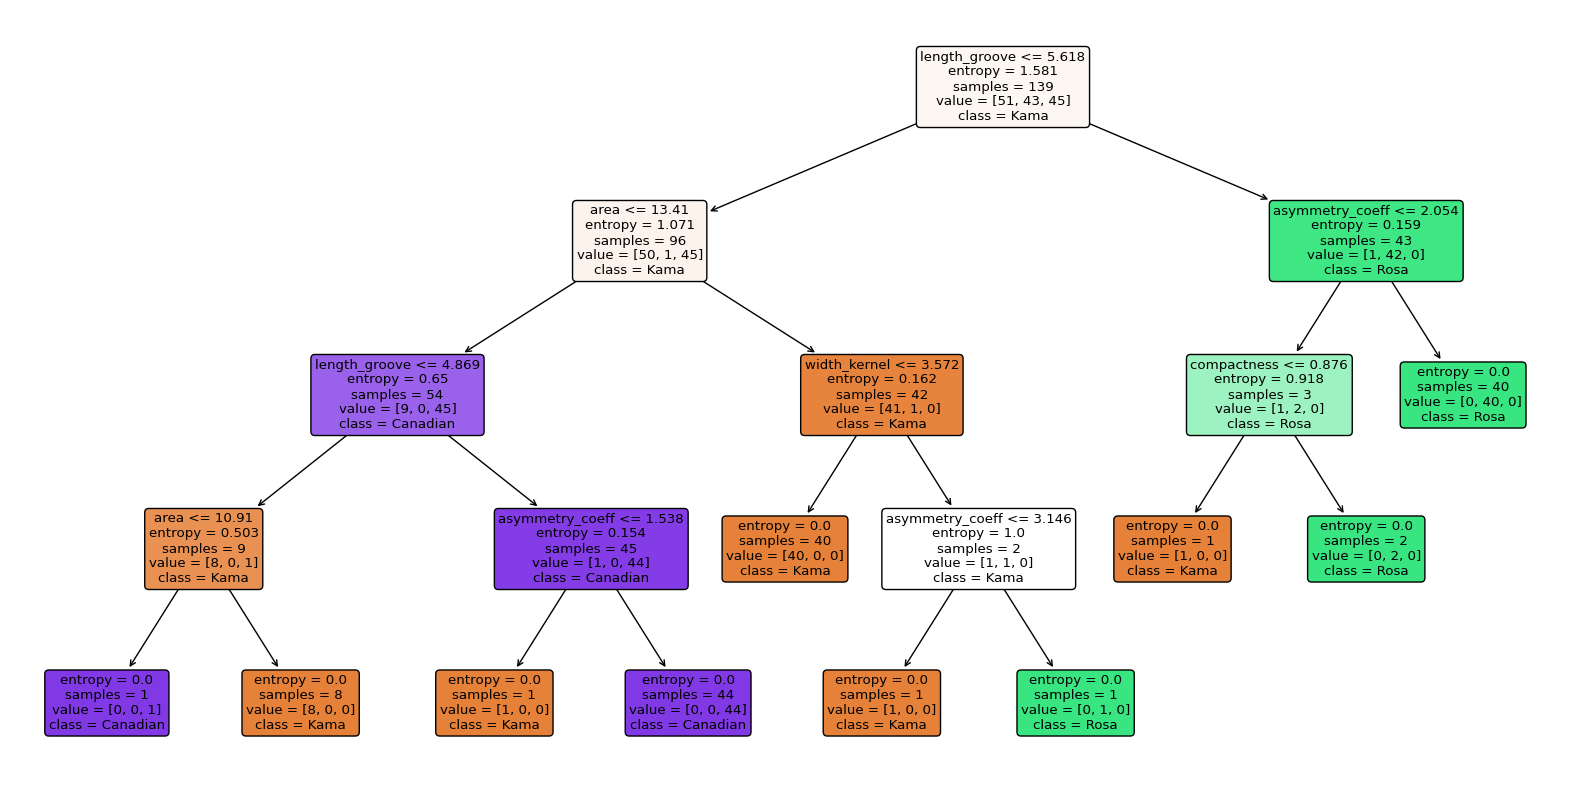

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, feature_names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel', 'asymmetry_coeff', 'length_groove'], class_names=['Kama', 'Rosa', 'Canadian'])
plt.show()

In [44]:
import piplite
await piplite.install('seaborn')

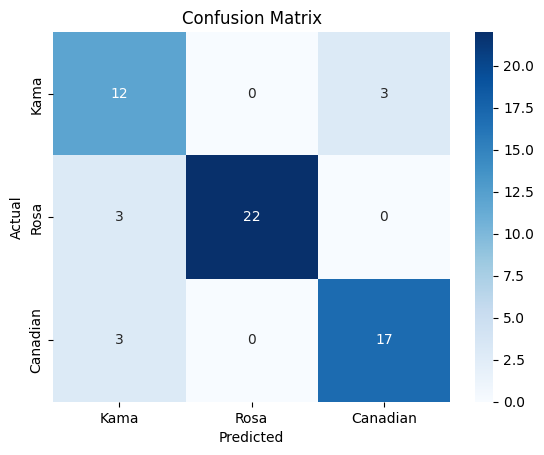

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Algorithme de KNN 

Accuracy: 0.92
F1-score: 0.91


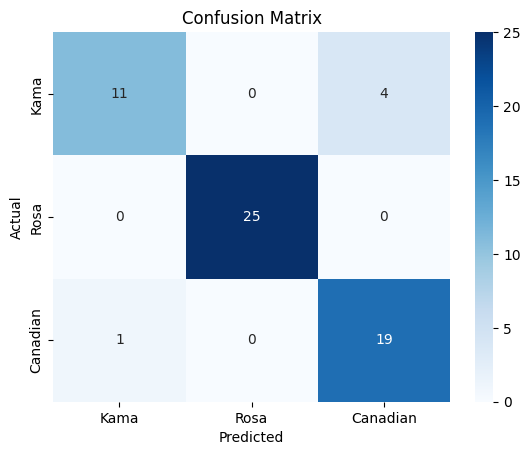

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns

# Création et entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calcul de l'accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy_knn))

# Calcul du F1-score
f1_knn = f1_score(y_test, y_pred, average='weighted')
print('F1-score: {:.2f}'.format(f1_knn))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

arbre de decision CART 

Accuracy: 0.87
F1-score: 0.87


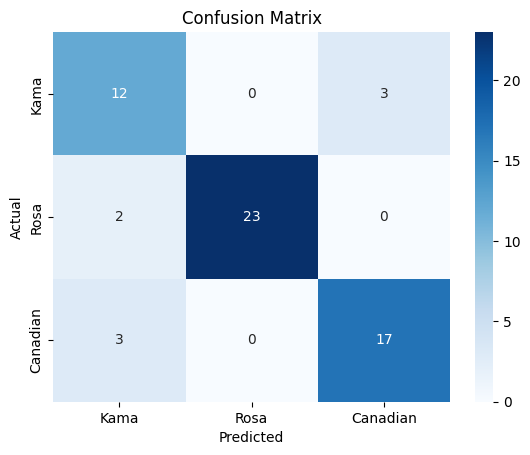

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns

# Création et entraînement du modèle CART
cart = DecisionTreeClassifier(random_state=0)
cart.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = cart.predict(X_test)

# Calcul de l'accuracy
accuracy_cart = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy_cart))

# Calcul du F1-score
f1_cart = f1_score(y_test, y_pred, average='weighted')
print('F1-score: {:.2f}'.format(f1_cart))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

LOGISTIC REGRESSION 

Accuracy: 0.93
F1-score: 0.93


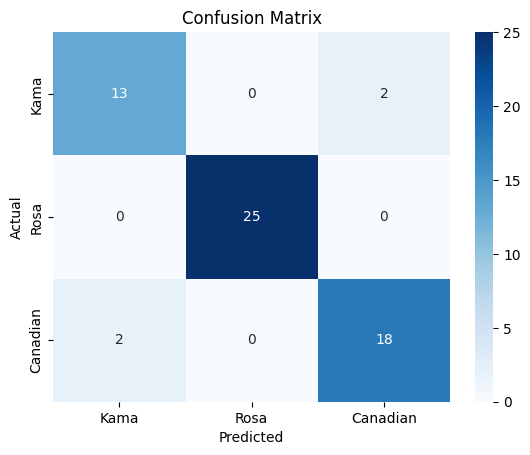

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Normalisation des données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle de régression logistique
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = lr.predict(X_test_scaled)

# Calcul de l'accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy_lr))

# Calcul du F1-score
f1_lr = f1_score(y_test, y_pred, average='weighted')
print('F1-score: {:.2f}'.format(f1_lr))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


random forest 

Accuracy: 0.88
F1-score: 0.88


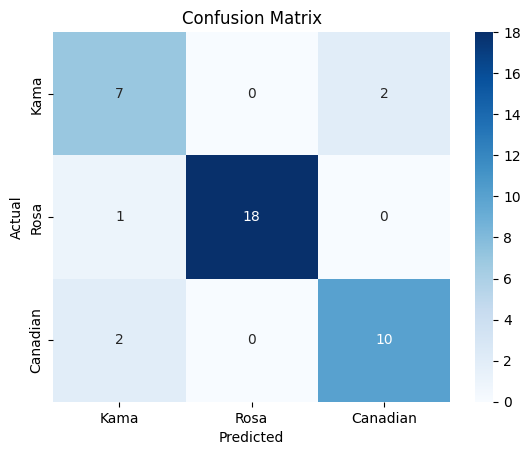

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns

# Création et entraînement du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)

# Calcul de l'accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy_rf))

# Calcul du F1-score
f1_rf = f1_score(y_test, y_pred, average='weighted')
print('F1-score: {:.2f}'.format(f1_rf))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM 

Accuracy: 0.88
F1-score: 0.87


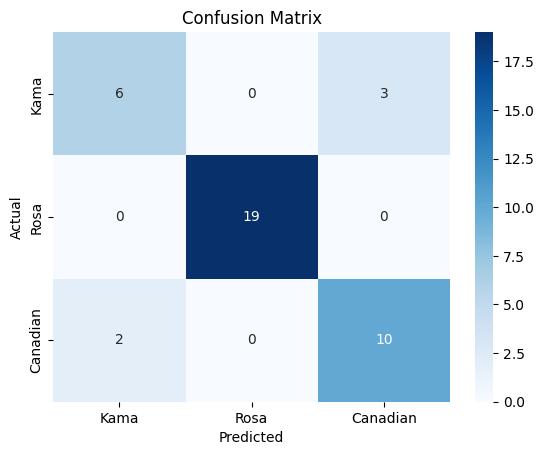

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score 
import seaborn as sns

# Création et entraînement du modèle SVM
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm.predict(X_test)

# Calcul de l'accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy_svm))

# Calcul du F1-score
f1_svm = f1_score(y_test, y_pred, average='weighted')
print('F1-score: {:.2f}'.format(f1_svm))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.93
F1-Score: 0.92


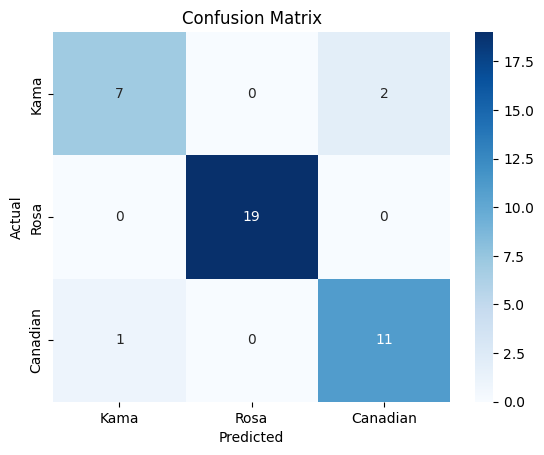

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


# Création et entraînement du modèle Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb.predict(X_test)

# Calcul de l'accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy_nb))

# Calcul du F1-score
f1_nb = f1_score(y_test, y_pred, average='weighted')
print('F1-Score: {:.2f}'.format(f1_nb))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




comparaison accuracy

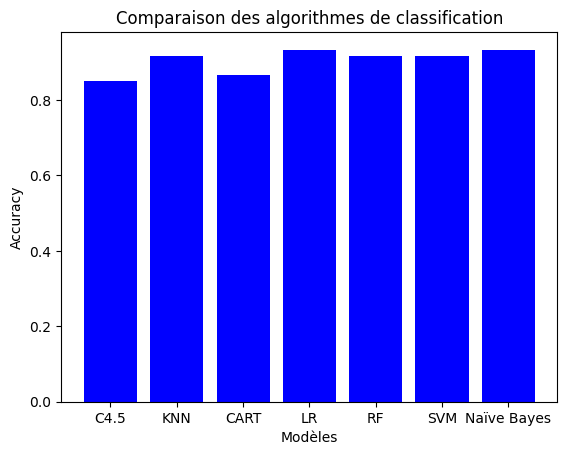

In [52]:
import matplotlib.pyplot as plt

# Accuracy de chaque modèle
accuracies = [accuracy_c45, accuracy_knn, accuracy_cart, accuracy_lr, accuracy_rf, accuracy_svm, accuracy_nb]

# Noms des modèles
models = ['C4.5', 'KNN', 'CART', 'LR', 'RF', 'SVM','Naïve Bayes']

# Création d'un graphique en barres
plt.bar(models, accuracies, color='b')

# Ajout de titres et d'étiquettes d'axe
plt.title('Comparaison des algorithmes de classification')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')

# Affichage du graphique
plt.show()


comparaison f1_score 

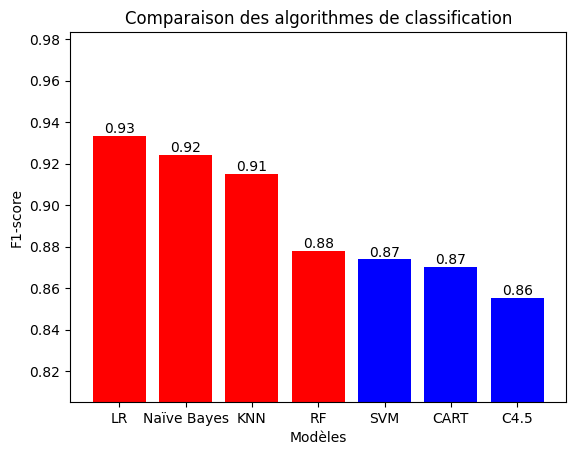

In [60]:
import matplotlib.pyplot as plt

# F1-score de chaque modèle
f1_scores = [f1_c45, f1_knn, f1_cart, f1_lr, f1_rf, f1_svm, f1_nb]

# Noms des modèles
models = ['C4.5', 'KNN', 'CART', 'LR', 'RF', 'SVM', 'Naïve Bayes']

# Tri des modèles par ordre décroissant
sorted_idx = sorted(range(len(f1_scores)), key=lambda k: f1_scores[k], reverse=True)
f1_scores_sorted = [f1_scores[i] for i in sorted_idx]
models_sorted = [models[i] for i in sorted_idx]

# Création d'un graphique en barres
plt.bar(models_sorted, f1_scores_sorted, color='b')

# Affichage des 4 F1-scores max en rouge
for i in range(4):
    plt.bar(models_sorted[i], f1_scores_sorted[i], color='r')

# Ajout des valeurs de chaque bâton
for i, v in enumerate(f1_scores_sorted):
    plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Ajout de titres et d'étiquettes d'axe
plt.title('Comparaison des algorithmes de classification')
plt.xlabel('Modèles')
plt.ylabel('F1-score')

# Redimensionnement de l'axe y
plt.ylim([min(f1_scores_sorted) - 0.05, max(f1_scores_sorted) + 0.05])

# Affichage du graphique
plt.show()


Protocole expérimentale

1ére combinaison entre Random forest et KNN

In [63]:
# 1ère combinaison : Random Forest + KNN
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_comb1 = [max(set(pred), key=pred.count) for pred in zip(y_pred_rf, y_pred_knn)]
f1_comb1 = f1_score(y_test, y_pred_comb1, average='weighted')
accuracy_comb1 = accuracy_score(y_test, y_pred_comb1)
confusion_matrix_comb1 = confusion_matrix(y_test, y_pred_comb1)

# 2ème combinaison : Random Forest + KNN + Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_pred_comb2 = [max(set(pred), key=pred.count) for pred in zip(y_pred_rf, y_pred_knn, y_pred_nb)]
f1_comb2 = f1_score(y_test, y_pred_comb2, average='weighted')
accuracy_comb2 = accuracy_score(y_test, y_pred_comb2)
confusion_matrix_comb2 = confusion_matrix(y_test, y_pred_comb2)

# 3ème combinaison : Random Forest + KNN + Naive Bayes + Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_comb3 = [max(set(pred), key=pred.count) for pred in zip(y_pred_rf, y_pred_knn, y_pred_nb, y_pred_lr)]
f1_comb3 = f1_score(y_test, y_pred_comb3, average='weighted')
accuracy_comb3 = accuracy_score(y_test, y_pred_comb3)
confusion_matrix_comb3 = confusion_matrix(y_test, y_pred_comb3)

# Afficher les résultats
print("1ère combinaison :")
print("F1-score : {:.2f}".format(f1_comb1))
print("Accuracy : {:.2f}".format(accuracy_comb1))
print("Matrice de confusion :\n", confusion_matrix_comb1)
print("2ème combinaison :")
print("F1-score : {:.2f}".format(f1_comb2))
print("Accuracy : {:.2f}".format(accuracy_comb2))
print("Matrice de confusion :\n", confusion_matrix_comb2)
print("3ème combinaison :")
print("F1-score : {:.2f}".format(f1_comb3))
print("Matrice de confusion :\n", confusion_matrix_comb3)


1ère combinaison :
F1-score : 0.86
Accuracy : 0.85
Matrice de confusion :
 [[ 7  0  2]
 [ 2 17  0]
 [ 2  0 10]]
2ème combinaison :
F1-score : 0.90
Accuracy : 0.90
Matrice de confusion :
 [[ 7  0  2]
 [ 0 19  0]
 [ 2  0 10]]
3ème combinaison :
F1-score : 0.90
Matrice de confusion :
 [[ 7  0  2]
 [ 0 19  0]
 [ 2  0 10]]
